# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda II

Vamos continuar trabalhando com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('previsao_de_renda.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).
2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?
3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?
4. Rode um modelo *stepwise*. Avalie o $R^2$ na vase de testes. Qual o melhor resultado?
5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?
6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.
7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.

In [4]:
df

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,16006,F,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58
14996,14996,2016-03-01,3722,F,False,True,0,Pensionista,Superior completo,Solteiro,Casa,57,NaN,1.0,10093.45
14997,14997,2016-03-01,6194,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
14998,14998,2016-03-01,4922,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


In [5]:
df1 = df.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12427 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             12427 non-null  int64  
 1   data_ref               12427 non-null  object 
 2   id_cliente             12427 non-null  int64  
 3   sexo                   12427 non-null  object 
 4   posse_de_veiculo       12427 non-null  bool   
 5   posse_de_imovel        12427 non-null  bool   
 6   qtd_filhos             12427 non-null  int64  
 7   tipo_renda             12427 non-null  object 
 8   educacao               12427 non-null  object 
 9   estado_civil           12427 non-null  object 
 10  tipo_residencia        12427 non-null  object 
 11  idade                  12427 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  12427 non-null  float64
 14  renda                  12427 non-null  float64
dtypes:

In [6]:
df2 = df1.reset_index()

In [7]:
print(df2[['sexo']].value_counts())
print()
print(df2[['tipo_renda']].value_counts())
print()
print(df2[['educacao']].value_counts())
print()
print(df2[['estado_civil']].value_counts())
print()
print(df2[['tipo_residencia']].value_counts())

sexo
F       7901
M       4526
dtype: int64

tipo_renda      
Assalariado         7633
Empresário          3508
Servidor público    1268
Bolsista               9
Pensionista            9
dtype: int64

educacao           
Secundário             7045
Superior completo      4695
Superior incompleto     558
Primário                103
Pós graduação            26
dtype: int64

estado_civil
Casado          8897
Solteiro        1543
União            924
Separado         739
Viúvo            324
dtype: int64

tipo_residencia
Casa               11071
Com os pais          674
Governamental        360
Aluguel              183
Estúdio               75
Comunitário           64
dtype: int64


In [35]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import patsy

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [9]:
# ITEM 1 - separando Base teste 25% e Treinamento 75%

X = (df2.drop(columns=['index', 'Unnamed: 0', 'renda']))
y = pd.DataFrame(df2['renda'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, train_size = 0.75, random_state=1000)

In [10]:
# ITEM 2 - Rodando uma regularização ridge com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] 
# e avalie o 𝑅2 na base de testes. Qual o melhor modelo?

teste = pd.concat([X_train, y_train], axis=1)
teste

modelo=('renda ~ posse_de_veiculo + posse_de_imovel + qtd_filhos + idade + tempo_emprego+'
       'qt_pessoas_residencia + C(sexo) + C(tipo_renda) + C(educacao) + C(estado_civil)+'
        'C(tipo_residencia)')

md = smf.ols(modelo, data = teste)
reg= md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.01
                         , alpha = 0)
print(reg.rsquared)
reg.summary()

0.25451412120198313


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     126.9
Date:                Wed, 20 Jul 2022   Prob (F-statistic):               0.00
Time:                        21:32:02   Log-Likelihood:                -96826.
No. Observations:                9320   AIC:                         1.937e+05
Df Residuals:                    9295   BIC:                         1.939e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                           -5906.8694   3268.995     -1.807      0.071   -1.23e+04     501.078
posse_de_veiculo[T.True]              121.7418    177.482      0.686      0.493    -226.163     469.646
posse_de_imovel[T.True]               369.1705    176.549      2.091      0.037      23.095     715.246
C(sexo)[T.M]                         6073.1331    183.762     33.049      0.000    5712.919    6433.347
C(tipo_renda)[T.Bolsista]           -1237.6011   2984.507     -0.415      0.678   -7087.888    4612.686
C(tipo_renda)[T.Empresário]           818.0896    188.208      4.347      0.000     449.160    1187.019
C(tipo_renda)[T.Pensionista]        -2895.8325   2984.891     -0.970      0.332   -8746.874    2955.209
C(tipo_renda)[T.Servidor público]     -19.5822    278.935     -0.070      0.944    -566.355     527.191
C(educacao)[T.Pós graduação]          579.4489   1948.917      0.297      0.766   -3240.856    4399.753
C(educacao)[T.Secundário]             307.4349    915.495      0.336      0.737   -1487.136    2102.005
C(educacao)[T.Superior completo]      912.5768    918.923      0.993      0.321    -888.714    2713.868
C(educacao)[T.Superior incompleto]   -276.7420    987.925     -0.280      0.779   -2213.291    1659.807
C(estado_civil)[T.Separado]          1609.6266   1558.135      1.033      0.302   -1444.660    4663.913
C(estado_civil)[T.Solteiro]          1033.8847   1532.857      0.674      0.500   -1970.850    4038.620
C(estado_civil)[T.União]             -469.2241    316.638     -1.482      0.138   -1089.905     151.457
C(estado_civil)[T.Viúvo]             1256.4132   1609.371      0.781      0.435   -1898.308    4411.134
C(tipo_residencia)[T.Casa]           -548.0392    697.970     -0.785      0.432   -1916.214     820.136
C(tipo_residencia)[T.Com os pais]    -580.4262    773.417     -0.750      0.453   -2096.493     935.640
C(tipo_residencia)[T.Comunitário]    -402.0556   1316.817     -0.305      0.760   -2983.306    2179.195
C(tipo_residencia)[T.Estúdio]         198.2778   1254.202      0.158      0.874   -2260.233    2656.789
C(tipo_residencia)[T.Governamental]    55.1705    847.207      0.065      0.948   -1605.540    1715.881
qtd_filhos                          -1481.9337   1519.620     -0.975      0.329   -4460.722    1496.854
idade                                  43.9244     10.092      4.352      0.000      24.141      63.708
tempo_emprego                         566.9048     13.020     43.541      0.000     541.382     592.427
qt_pessoas_residencia                1585.9867   1517.817      1.045      0.296   -1389.267    4561.240
==============================================================================
Omnibus:                    13663.092   Durbin-Watson:                   1.993
Prob(Omnibus)

In [11]:
reg= md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.001
                         , alpha = 0.001)
print(reg.rsquared)
reg.summary()

0.25451412120198313


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     126.9
Date:                Wed, 20 Jul 2022   Prob (F-statistic):               0.00
Time:                        21:32:04   Log-Likelihood:                -96826.
No. Observations:                9320   AIC:                         1.937e+05
Df Residuals:                    9295   BIC:                         1.939e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                           -5906.8694   3268.995     -1.807      0.071   -1.23e+04     501.078
posse_de_veiculo[T.True]              121.7418    177.482      0.686      0.493    -226.163     469.646
posse_de_imovel[T.True]               369.1705    176.549      2.091      0.037      23.095     715.246
C(sexo)[T.M]                         6073.1331    183.762     33.049      0.000    5712.919    6433.347
C(tipo_renda)[T.Bolsista]           -1237.6011   2984.507     -0.415      0.678   -7087.888    4612.686
C(tipo_renda)[T.Empresário]           818.0896    188.208      4.347      0.000     449.160    1187.019
C(tipo_renda)[T.Pensionista]        -2895.8325   2984.891     -0.970      0.332   -8746.874    2955.209
C(tipo_renda)[T.Servidor público]     -19.5822    278.935     -0.070      0.944    -566.355     527.191
C(educacao)[T.Pós graduação]          579.4489   1948.917      0.297      0.766   -3240.856    4399.753
C(educacao)[T.Secundário]             307.4349    915.495      0.336      0.737   -1487.136    2102.005
C(educacao)[T.Superior completo]      912.5768    918.923      0.993      0.321    -888.714    2713.868
C(educacao)[T.Superior incompleto]   -276.7420    987.925     -0.280      0.779   -2213.291    1659.807
C(estado_civil)[T.Separado]          1609.6266   1558.135      1.033      0.302   -1444.660    4663.913
C(estado_civil)[T.Solteiro]          1033.8847   1532.857      0.674      0.500   -1970.850    4038.620
C(estado_civil)[T.União]             -469.2241    316.638     -1.482      0.138   -1089.905     151.457
C(estado_civil)[T.Viúvo]             1256.4132   1609.371      0.781      0.435   -1898.308    4411.134
C(tipo_residencia)[T.Casa]           -548.0392    697.970     -0.785      0.432   -1916.214     820.136
C(tipo_residencia)[T.Com os pais]    -580.4262    773.417     -0.750      0.453   -2096.493     935.640
C(tipo_residencia)[T.Comunitário]    -402.0556   1316.817     -0.305      0.760   -2983.306    2179.195
C(tipo_residencia)[T.Estúdio]         198.2778   1254.202      0.158      0.874   -2260.233    2656.789
C(tipo_residencia)[T.Governamental]    55.1705    847.207      0.065      0.948   -1605.540    1715.881
qtd_filhos                          -1481.9337   1519.620     -0.975      0.329   -4460.722    1496.854
idade                                  43.9244     10.092      4.352      0.000      24.141      63.708
tempo_emprego                         566.9048     13.020     43.541      0.000     541.382     592.427
qt_pessoas_residencia                1585.9867   1517.817      1.045      0.296   -1389.267    4561.240
==============================================================================
Omnibus:                    13663.092   Durbin-Watson:                   1.993
Prob(Omnibus)

In [12]:
reg= md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.001
                         , alpha = 0.005)
print(reg.rsquared)
reg.summary()

0.25451412120198313


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     126.9
Date:                Wed, 20 Jul 2022   Prob (F-statistic):               0.00
Time:                        21:32:06   Log-Likelihood:                -96826.
No. Observations:                9320   AIC:                         1.937e+05
Df Residuals:                    9295   BIC:                         1.939e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                           -5906.8694   3268.995     -1.807      0.071   -1.23e+04     501.078
posse_de_veiculo[T.True]              121.7418    177.482      0.686      0.493    -226.163     469.646
posse_de_imovel[T.True]               369.1705    176.549      2.091      0.037      23.095     715.246
C(sexo)[T.M]                         6073.1331    183.762     33.049      0.000    5712.919    6433.347
C(tipo_renda)[T.Bolsista]           -1237.6011   2984.507     -0.415      0.678   -7087.888    4612.686
C(tipo_renda)[T.Empresário]           818.0896    188.208      4.347      0.000     449.160    1187.019
C(tipo_renda)[T.Pensionista]        -2895.8325   2984.891     -0.970      0.332   -8746.874    2955.209
C(tipo_renda)[T.Servidor público]     -19.5822    278.935     -0.070      0.944    -566.355     527.191
C(educacao)[T.Pós graduação]          579.4489   1948.917      0.297      0.766   -3240.856    4399.753
C(educacao)[T.Secundário]             307.4349    915.495      0.336      0.737   -1487.136    2102.005
C(educacao)[T.Superior completo]      912.5768    918.923      0.993      0.321    -888.714    2713.868
C(educacao)[T.Superior incompleto]   -276.7420    987.925     -0.280      0.779   -2213.291    1659.807
C(estado_civil)[T.Separado]          1609.6266   1558.135      1.033      0.302   -1444.660    4663.913
C(estado_civil)[T.Solteiro]          1033.8847   1532.857      0.674      0.500   -1970.850    4038.620
C(estado_civil)[T.União]             -469.2241    316.638     -1.482      0.138   -1089.905     151.457
C(estado_civil)[T.Viúvo]             1256.4132   1609.371      0.781      0.435   -1898.308    4411.134
C(tipo_residencia)[T.Casa]           -548.0392    697.970     -0.785      0.432   -1916.214     820.136
C(tipo_residencia)[T.Com os pais]    -580.4262    773.417     -0.750      0.453   -2096.493     935.640
C(tipo_residencia)[T.Comunitário]    -402.0556   1316.817     -0.305      0.760   -2983.306    2179.195
C(tipo_residencia)[T.Estúdio]         198.2778   1254.202      0.158      0.874   -2260.233    2656.789
C(tipo_residencia)[T.Governamental]    55.1705    847.207      0.065      0.948   -1605.540    1715.881
qtd_filhos                          -1481.9337   1519.620     -0.975      0.329   -4460.722    1496.854
idade                                  43.9244     10.092      4.352      0.000      24.141      63.708
tempo_emprego                         566.9048     13.020     43.541      0.000     541.382     592.427
qt_pessoas_residencia                1585.9867   1517.817      1.045      0.296   -1389.267    4561.240
==============================================================================
Omnibus:                    13663.092   Durbin-Watson:                   1.993
Prob(Omnibus)

In [13]:
reg= md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.01
                         , alpha = 0.01)
print(reg.rsquared)
reg.summary()

0.25451412120198313


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     126.9
Date:                Wed, 20 Jul 2022   Prob (F-statistic):               0.00
Time:                        21:32:08   Log-Likelihood:                -96826.
No. Observations:                9320   AIC:                         1.937e+05
Df Residuals:                    9295   BIC:                         1.939e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                           -5906.8694   3268.995     -1.807      0.071   -1.23e+04     501.078
posse_de_veiculo[T.True]              121.7418    177.482      0.686      0.493    -226.163     469.646
posse_de_imovel[T.True]               369.1705    176.549      2.091      0.037      23.095     715.246
C(sexo)[T.M]                         6073.1331    183.762     33.049      0.000    5712.919    6433.347
C(tipo_renda)[T.Bolsista]           -1237.6011   2984.507     -0.415      0.678   -7087.888    4612.686
C(tipo_renda)[T.Empresário]           818.0896    188.208      4.347      0.000     449.160    1187.019
C(tipo_renda)[T.Pensionista]        -2895.8325   2984.891     -0.970      0.332   -8746.874    2955.209
C(tipo_renda)[T.Servidor público]     -19.5822    278.935     -0.070      0.944    -566.355     527.191
C(educacao)[T.Pós graduação]          579.4489   1948.917      0.297      0.766   -3240.856    4399.753
C(educacao)[T.Secundário]             307.4349    915.495      0.336      0.737   -1487.136    2102.005
C(educacao)[T.Superior completo]      912.5768    918.923      0.993      0.321    -888.714    2713.868
C(educacao)[T.Superior incompleto]   -276.7420    987.925     -0.280      0.779   -2213.291    1659.807
C(estado_civil)[T.Separado]          1609.6266   1558.135      1.033      0.302   -1444.660    4663.913
C(estado_civil)[T.Solteiro]          1033.8847   1532.857      0.674      0.500   -1970.850    4038.620
C(estado_civil)[T.União]             -469.2241    316.638     -1.482      0.138   -1089.905     151.457
C(estado_civil)[T.Viúvo]             1256.4132   1609.371      0.781      0.435   -1898.308    4411.134
C(tipo_residencia)[T.Casa]           -548.0392    697.970     -0.785      0.432   -1916.214     820.136
C(tipo_residencia)[T.Com os pais]    -580.4262    773.417     -0.750      0.453   -2096.493     935.640
C(tipo_residencia)[T.Comunitário]    -402.0556   1316.817     -0.305      0.760   -2983.306    2179.195
C(tipo_residencia)[T.Estúdio]         198.2778   1254.202      0.158      0.874   -2260.233    2656.789
C(tipo_residencia)[T.Governamental]    55.1705    847.207      0.065      0.948   -1605.540    1715.881
qtd_filhos                          -1481.9337   1519.620     -0.975      0.329   -4460.722    1496.854
idade                                  43.9244     10.092      4.352      0.000      24.141      63.708
tempo_emprego                         566.9048     13.020     43.541      0.000     541.382     592.427
qt_pessoas_residencia                1585.9867   1517.817      1.045      0.296   -1389.267    4561.240
==============================================================================
Omnibus:                    13663.092   Durbin-Watson:                   1.993
Prob(Omnibus)

In [14]:
reg= md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.01
                         , alpha = 0.05)
print(reg.rsquared)
reg.summary()

0.25451412120198313


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     126.9
Date:                Wed, 20 Jul 2022   Prob (F-statistic):               0.00
Time:                        21:32:10   Log-Likelihood:                -96826.
No. Observations:                9320   AIC:                         1.937e+05
Df Residuals:                    9295   BIC:                         1.939e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                           -5906.8694   3268.995     -1.807      0.071   -1.23e+04     501.078
posse_de_veiculo[T.True]              121.7418    177.482      0.686      0.493    -226.163     469.646
posse_de_imovel[T.True]               369.1705    176.549      2.091      0.037      23.095     715.246
C(sexo)[T.M]                         6073.1331    183.762     33.049      0.000    5712.919    6433.347
C(tipo_renda)[T.Bolsista]           -1237.6011   2984.507     -0.415      0.678   -7087.888    4612.686
C(tipo_renda)[T.Empresário]           818.0896    188.208      4.347      0.000     449.160    1187.019
C(tipo_renda)[T.Pensionista]        -2895.8325   2984.891     -0.970      0.332   -8746.874    2955.209
C(tipo_renda)[T.Servidor público]     -19.5822    278.935     -0.070      0.944    -566.355     527.191
C(educacao)[T.Pós graduação]          579.4489   1948.917      0.297      0.766   -3240.856    4399.753
C(educacao)[T.Secundário]             307.4349    915.495      0.336      0.737   -1487.136    2102.005
C(educacao)[T.Superior completo]      912.5768    918.923      0.993      0.321    -888.714    2713.868
C(educacao)[T.Superior incompleto]   -276.7420    987.925     -0.280      0.779   -2213.291    1659.807
C(estado_civil)[T.Separado]          1609.6266   1558.135      1.033      0.302   -1444.660    4663.913
C(estado_civil)[T.Solteiro]          1033.8847   1532.857      0.674      0.500   -1970.850    4038.620
C(estado_civil)[T.União]             -469.2241    316.638     -1.482      0.138   -1089.905     151.457
C(estado_civil)[T.Viúvo]             1256.4132   1609.371      0.781      0.435   -1898.308    4411.134
C(tipo_residencia)[T.Casa]           -548.0392    697.970     -0.785      0.432   -1916.214     820.136
C(tipo_residencia)[T.Com os pais]    -580.4262    773.417     -0.750      0.453   -2096.493     935.640
C(tipo_residencia)[T.Comunitário]    -402.0556   1316.817     -0.305      0.760   -2983.306    2179.195
C(tipo_residencia)[T.Estúdio]         198.2778   1254.202      0.158      0.874   -2260.233    2656.789
C(tipo_residencia)[T.Governamental]    55.1705    847.207      0.065      0.948   -1605.540    1715.881
qtd_filhos                          -1481.9337   1519.620     -0.975      0.329   -4460.722    1496.854
idade                                  43.9244     10.092      4.352      0.000      24.141      63.708
tempo_emprego                         566.9048     13.020     43.541      0.000     541.382     592.427
qt_pessoas_residencia                1585.9867   1517.817      1.045      0.296   -1389.267    4561.240
==============================================================================
Omnibus:                    13663.092   Durbin-Watson:                   1.993
Prob(Omnibus)

In [15]:
reg= md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.01
                         , alpha = 0.1)
print(reg.rsquared)
reg.summary()

0.25451412120198313


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     126.9
Date:                Wed, 20 Jul 2022   Prob (F-statistic):               0.00
Time:                        21:32:11   Log-Likelihood:                -96826.
No. Observations:                9320   AIC:                         1.937e+05
Df Residuals:                    9295   BIC:                         1.939e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                           -5906.8694   3268.995     -1.807      0.071   -1.23e+04     501.078
posse_de_veiculo[T.True]              121.7418    177.482      0.686      0.493    -226.163     469.646
posse_de_imovel[T.True]               369.1705    176.549      2.091      0.037      23.095     715.246
C(sexo)[T.M]                         6073.1331    183.762     33.049      0.000    5712.919    6433.347
C(tipo_renda)[T.Bolsista]           -1237.6011   2984.507     -0.415      0.678   -7087.888    4612.686
C(tipo_renda)[T.Empresário]           818.0896    188.208      4.347      0.000     449.160    1187.019
C(tipo_renda)[T.Pensionista]        -2895.8325   2984.891     -0.970      0.332   -8746.874    2955.209
C(tipo_renda)[T.Servidor público]     -19.5822    278.935     -0.070      0.944    -566.355     527.191
C(educacao)[T.Pós graduação]          579.4489   1948.917      0.297      0.766   -3240.856    4399.753
C(educacao)[T.Secundário]             307.4349    915.495      0.336      0.737   -1487.136    2102.005
C(educacao)[T.Superior completo]      912.5768    918.923      0.993      0.321    -888.714    2713.868
C(educacao)[T.Superior incompleto]   -276.7420    987.925     -0.280      0.779   -2213.291    1659.807
C(estado_civil)[T.Separado]          1609.6266   1558.135      1.033      0.302   -1444.660    4663.913
C(estado_civil)[T.Solteiro]          1033.8847   1532.857      0.674      0.500   -1970.850    4038.620
C(estado_civil)[T.União]             -469.2241    316.638     -1.482      0.138   -1089.905     151.457
C(estado_civil)[T.Viúvo]             1256.4132   1609.371      0.781      0.435   -1898.308    4411.134
C(tipo_residencia)[T.Casa]           -548.0392    697.970     -0.785      0.432   -1916.214     820.136
C(tipo_residencia)[T.Com os pais]    -580.4262    773.417     -0.750      0.453   -2096.493     935.640
C(tipo_residencia)[T.Comunitário]    -402.0556   1316.817     -0.305      0.760   -2983.306    2179.195
C(tipo_residencia)[T.Estúdio]         198.2778   1254.202      0.158      0.874   -2260.233    2656.789
C(tipo_residencia)[T.Governamental]    55.1705    847.207      0.065      0.948   -1605.540    1715.881
qtd_filhos                          -1481.9337   1519.620     -0.975      0.329   -4460.722    1496.854
idade                                  43.9244     10.092      4.352      0.000      24.141      63.708
tempo_emprego                         566.9048     13.020     43.541      0.000     541.382     592.427
qt_pessoas_residencia                1585.9867   1517.817      1.045      0.296   -1389.267    4561.240
==============================================================================
Omnibus:                    13663.092   Durbin-Watson:                   1.993
Prob(Omnibus)

**Rodando uma regularização ridge com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1], verificou-se que todos os modelos de regularização pelo método ridge apresentação o mesmo R², igual a 0,255. Assim sendo, por este médoto não foi possível eleger o melhor modelo.**

In [16]:
# ITEM 3: Faça o mesmo que no passo 2, com uma regressão LASSO. Qual método chega a um melhor resultado?

reg= md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0)

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     126.9
Date:                Wed, 20 Jul 2022   Prob (F-statistic):               0.00
Time:                        21:32:17   Log-Likelihood:                -96826.
No. Observations:                9320   AIC:                         1.937e+05
Df Residuals:                    9295   BIC:                         1.939e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                           -5906.8694   3268.995     -1.807      0.071   -1.23e+04     501.078
posse_de_veiculo[T.True]              121.7418    177.482      0.686      0.493    -226.163     469.646
posse_de_imovel[T.True]               369.1705    176.549      2.091      0.037      23.095     715.246
C(sexo)[T.M]                         6073.1331    183.762     33.049      0.000    5712.919    6433.347
C(tipo_renda)[T.Bolsista]           -1237.6011   2984.507     -0.415      0.678   -7087.888    4612.686
C(tipo_renda)[T.Empresário]           818.0896    188.208      4.347      0.000     449.160    1187.019
C(tipo_renda)[T.Pensionista]        -2895.8325   2984.891     -0.970      0.332   -8746.874    2955.209
C(tipo_renda)[T.Servidor público]     -19.5822    278.935     -0.070      0.944    -566.355     527.191
C(educacao)[T.Pós graduação]          579.4489   1948.917      0.297      0.766   -3240.856    4399.753
C(educacao)[T.Secundário]             307.4349    915.495      0.336      0.737   -1487.136    2102.005
C(educacao)[T.Superior completo]      912.5768    918.923      0.993      0.321    -888.714    2713.868
C(educacao)[T.Superior incompleto]   -276.7420    987.925     -0.280      0.779   -2213.291    1659.807
C(estado_civil)[T.Separado]          1609.6266   1558.135      1.033      0.302   -1444.660    4663.913
C(estado_civil)[T.Solteiro]          1033.8847   1532.857      0.674      0.500   -1970.850    4038.620
C(estado_civil)[T.União]             -469.2241    316.638     -1.482      0.138   -1089.905     151.457
C(estado_civil)[T.Viúvo]             1256.4132   1609.371      0.781      0.435   -1898.308    4411.134
C(tipo_residencia)[T.Casa]           -548.0392    697.970     -0.785      0.432   -1916.214     820.136
C(tipo_residencia)[T.Com os pais]    -580.4262    773.417     -0.750      0.453   -2096.493     935.640
C(tipo_residencia)[T.Comunitário]    -402.0556   1316.817     -0.305      0.760   -2983.306    2179.195
C(tipo_residencia)[T.Estúdio]         198.2778   1254.202      0.158      0.874   -2260.233    2656.789
C(tipo_residencia)[T.Governamental]    55.1705    847.207      0.065      0.948   -1605.540    1715.881
qtd_filhos                          -1481.9337   1519.620     -0.975      0.329   -4460.722    1496.854
idade                                  43.9244     10.092      4.352      0.000      24.141      63.708
tempo_emprego                         566.9048     13.020     43.541      0.000     541.382     592.427
qt_pessoas_residencia                1585.9867   1517.817      1.045      0.296   -1389.267    4561.240
==============================================================================
Omnibus:                    13663.092   Durbin-Watson:                   1.993
Prob(Omnibus)

In [17]:
reg= md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.001)

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     132.2
Date:                Wed, 20 Jul 2022   Prob (F-statistic):               0.00
Time:                        21:32:18   Log-Likelihood:                -96826.
No. Observations:                9320   AIC:                         1.937e+05
Df Residuals:                    9296   BIC:                         1.939e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                           -5908.4008   3268.747     -1.808      0.071   -1.23e+04     499.061
posse_de_veiculo[T.True]              121.8081    177.470      0.686      0.493    -226.073     469.689
posse_de_imovel[T.True]               369.4165    176.505      2.093      0.036      23.428     715.405
C(sexo)[T.M]                         6073.5385    183.662     33.069      0.000    5713.522    6433.556
C(tipo_renda)[T.Bolsista]           -1233.7385   2983.840     -0.413      0.679   -7082.719    4615.242
C(tipo_renda)[T.Empresário]           820.8640    184.003      4.461      0.000     460.178    1181.550
C(tipo_renda)[T.Pensionista]        -2892.3055   2984.309     -0.969      0.332   -8742.205    2957.594
C(tipo_renda)[T.Servidor público]            0          0        nan        nan           0           0
C(educacao)[T.Pós graduação]          579.3922   1948.812      0.297      0.766   -3240.707    4399.492
C(educacao)[T.Secundário]             306.8405    915.407      0.335      0.737   -1487.557    2101.238
C(educacao)[T.Superior completo]      910.7430    918.503      0.992      0.321    -889.723    2711.210
C(educacao)[T.Superior incompleto]   -277.3102    987.839     -0.281      0.779   -2213.691    1659.070
C(estado_civil)[T.Separado]          1610.3418   1558.019      1.034      0.301   -1443.716    4664.400
C(estado_civil)[T.Solteiro]          1033.5416   1532.767      0.674      0.500   -1971.017    4038.100
C(estado_civil)[T.União]             -468.9237    316.593     -1.481      0.139   -1089.514     151.667
C(estado_civil)[T.Viúvo]             1255.1224   1609.180      0.780      0.435   -1899.224    4409.469
C(tipo_residencia)[T.Casa]           -547.8810    697.929     -0.785      0.432   -1915.976     820.214
C(tipo_residencia)[T.Com os pais]    -580.2425    773.371     -0.750      0.453   -2096.219     935.734
C(tipo_residencia)[T.Comunitário]    -401.2918   1316.702     -0.305      0.761   -2982.316    2179.732
C(tipo_residencia)[T.Estúdio]         195.1156   1253.326      0.156      0.876   -2261.678    2651.909
C(tipo_residencia)[T.Governamental]    55.8557    847.105      0.066      0.947   -1604.656    1716.367
qtd_filhos                          -1481.9142   1519.538     -0.975      0.329   -4460.543    1496.714
idade                                  43.9313     10.091      4.353      0.000      24.150      63.713
tempo_emprego                         566.8060     12.943     43.791      0.000     541.434     592.178
qt_pessoas_residencia                1585.8882   1517.735      1.045      0.296   -1389.205    4560.981
==============================================================================
Omnibus:                    13663.503   Durbin-Watson:                   1.993
Prob(Omnibus)

In [18]:
reg= md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.005)

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     132.2
Date:                Wed, 20 Jul 2022   Prob (F-statistic):               0.00
Time:                        21:32:19   Log-Likelihood:                -96826.
No. Observations:                9320   AIC:                         1.937e+05
Df Residuals:                    9296   BIC:                         1.939e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                           -5908.4008   3268.747     -1.808      0.071   -1.23e+04     499.061
posse_de_veiculo[T.True]              121.8081    177.470      0.686      0.493    -226.073     469.689
posse_de_imovel[T.True]               369.4165    176.505      2.093      0.036      23.428     715.405
C(sexo)[T.M]                         6073.5385    183.662     33.069      0.000    5713.522    6433.556
C(tipo_renda)[T.Bolsista]           -1233.7385   2983.840     -0.413      0.679   -7082.719    4615.242
C(tipo_renda)[T.Empresário]           820.8640    184.003      4.461      0.000     460.178    1181.550
C(tipo_renda)[T.Pensionista]        -2892.3055   2984.309     -0.969      0.332   -8742.205    2957.594
C(tipo_renda)[T.Servidor público]            0          0        nan        nan           0           0
C(educacao)[T.Pós graduação]          579.3922   1948.812      0.297      0.766   -3240.707    4399.492
C(educacao)[T.Secundário]             306.8405    915.407      0.335      0.737   -1487.557    2101.238
C(educacao)[T.Superior completo]      910.7430    918.503      0.992      0.321    -889.723    2711.210
C(educacao)[T.Superior incompleto]   -277.3102    987.839     -0.281      0.779   -2213.691    1659.070
C(estado_civil)[T.Separado]          1610.3418   1558.019      1.034      0.301   -1443.716    4664.400
C(estado_civil)[T.Solteiro]          1033.5416   1532.767      0.674      0.500   -1971.017    4038.100
C(estado_civil)[T.União]             -468.9237    316.593     -1.481      0.139   -1089.514     151.667
C(estado_civil)[T.Viúvo]             1255.1224   1609.180      0.780      0.435   -1899.224    4409.469
C(tipo_residencia)[T.Casa]           -547.8810    697.929     -0.785      0.432   -1915.976     820.214
C(tipo_residencia)[T.Com os pais]    -580.2425    773.371     -0.750      0.453   -2096.219     935.734
C(tipo_residencia)[T.Comunitário]    -401.2918   1316.702     -0.305      0.761   -2982.316    2179.732
C(tipo_residencia)[T.Estúdio]         195.1156   1253.326      0.156      0.876   -2261.678    2651.909
C(tipo_residencia)[T.Governamental]    55.8557    847.105      0.066      0.947   -1604.656    1716.367
qtd_filhos                          -1481.9142   1519.538     -0.975      0.329   -4460.543    1496.714
idade                                  43.9313     10.091      4.353      0.000      24.150      63.713
tempo_emprego                         566.8060     12.943     43.791      0.000     541.434     592.178
qt_pessoas_residencia                1585.8882   1517.735      1.045      0.296   -1389.205    4560.981
==============================================================================
Omnibus:                    13663.503   Durbin-Watson:                   1.993
Prob(Omnibus)

In [19]:
reg= md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.01)

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     132.2
Date:                Wed, 20 Jul 2022   Prob (F-statistic):               0.00
Time:                        21:32:20   Log-Likelihood:                -96826.
No. Observations:                9320   AIC:                         1.937e+05
Df Residuals:                    9296   BIC:                         1.939e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                           -5908.4008   3268.747     -1.808      0.071   -1.23e+04     499.061
posse_de_veiculo[T.True]              121.8081    177.470      0.686      0.493    -226.073     469.689
posse_de_imovel[T.True]               369.4165    176.505      2.093      0.036      23.428     715.405
C(sexo)[T.M]                         6073.5385    183.662     33.069      0.000    5713.522    6433.556
C(tipo_renda)[T.Bolsista]           -1233.7385   2983.840     -0.413      0.679   -7082.719    4615.242
C(tipo_renda)[T.Empresário]           820.8640    184.003      4.461      0.000     460.178    1181.550
C(tipo_renda)[T.Pensionista]        -2892.3055   2984.309     -0.969      0.332   -8742.205    2957.594
C(tipo_renda)[T.Servidor público]            0          0        nan        nan           0           0
C(educacao)[T.Pós graduação]          579.3922   1948.812      0.297      0.766   -3240.707    4399.492
C(educacao)[T.Secundário]             306.8405    915.407      0.335      0.737   -1487.557    2101.238
C(educacao)[T.Superior completo]      910.7430    918.503      0.992      0.321    -889.723    2711.210
C(educacao)[T.Superior incompleto]   -277.3102    987.839     -0.281      0.779   -2213.691    1659.070
C(estado_civil)[T.Separado]          1610.3418   1558.019      1.034      0.301   -1443.716    4664.400
C(estado_civil)[T.Solteiro]          1033.5416   1532.767      0.674      0.500   -1971.017    4038.100
C(estado_civil)[T.União]             -468.9237    316.593     -1.481      0.139   -1089.514     151.667
C(estado_civil)[T.Viúvo]             1255.1224   1609.180      0.780      0.435   -1899.224    4409.469
C(tipo_residencia)[T.Casa]           -547.8810    697.929     -0.785      0.432   -1915.976     820.214
C(tipo_residencia)[T.Com os pais]    -580.2425    773.371     -0.750      0.453   -2096.219     935.734
C(tipo_residencia)[T.Comunitário]    -401.2918   1316.702     -0.305      0.761   -2982.316    2179.732
C(tipo_residencia)[T.Estúdio]         195.1156   1253.326      0.156      0.876   -2261.678    2651.909
C(tipo_residencia)[T.Governamental]    55.8557    847.105      0.066      0.947   -1604.656    1716.367
qtd_filhos                          -1481.9142   1519.538     -0.975      0.329   -4460.543    1496.714
idade                                  43.9313     10.091      4.353      0.000      24.150      63.713
tempo_emprego                         566.8060     12.943     43.791      0.000     541.434     592.178
qt_pessoas_residencia                1585.8882   1517.735      1.045      0.296   -1389.205    4560.981
==============================================================================
Omnibus:                    13663.503   Durbin-Watson:                   1.993
Prob(Omnibus)

In [20]:
reg= md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.05)

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     138.0
Date:                Wed, 20 Jul 2022   Prob (F-statistic):               0.00
Time:                        21:32:22   Log-Likelihood:                -96826.
No. Observations:                9320   AIC:                         1.937e+05
Df Residuals:                    9297   BIC:                         1.939e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                           -6034.2065   3242.420     -1.861      0.063   -1.24e+04     321.648
posse_de_veiculo[T.True]              120.2348    177.387      0.678      0.498    -227.482     467.952
posse_de_imovel[T.True]               369.4920    176.496      2.093      0.036      23.521     715.463
C(sexo)[T.M]                         6076.0019    183.475     33.116      0.000    5716.351    6435.653
C(tipo_renda)[T.Bolsista]           -1230.3869   2983.674     -0.412      0.680   -7079.042    4618.268
C(tipo_renda)[T.Empresário]           822.1084    183.949      4.469      0.000     461.529    1182.688
C(tipo_renda)[T.Pensionista]        -2891.9887   2984.163     -0.969      0.333   -8741.602    2957.625
C(tipo_renda)[T.Servidor público]            0          0        nan        nan           0           0
C(educacao)[T.Pós graduação]          597.5276   1947.809      0.307      0.759   -3220.605    4415.660
C(educacao)[T.Secundário]             326.0635    913.187      0.357      0.721   -1463.982    2116.109
C(educacao)[T.Superior completo]      926.8501    916.936      1.011      0.312    -870.546    2724.246
C(educacao)[T.Superior incompleto]   -259.5050    986.062     -0.263      0.792   -2192.402    1673.392
C(estado_civil)[T.Separado]          1610.7826   1557.942      1.034      0.301   -1443.125    4664.690
C(estado_civil)[T.Solteiro]          1034.6765   1532.687      0.675      0.500   -1969.727    4039.080
C(estado_civil)[T.União]             -467.6949    316.551     -1.477      0.140   -1088.205     152.815
C(estado_civil)[T.Viúvo]             1255.6225   1609.101      0.780      0.435   -1898.568    4409.813
C(tipo_residencia)[T.Casa]           -437.1061    595.786     -0.734      0.463   -1604.977     730.764
C(tipo_residencia)[T.Com os pais]    -469.8337    683.241     -0.688      0.492   -1809.137     869.469
C(tipo_residencia)[T.Comunitário]            0          0        nan        nan           0           0
C(tipo_residencia)[T.Estúdio]         305.4786   1199.815      0.255      0.799   -2046.421    2657.378
C(tipo_residencia)[T.Governamental]   166.8669    764.758      0.218      0.827   -1332.227    1665.961
qtd_filhos                          -1481.6002   1519.464     -0.975      0.330   -4460.082    1496.882
idade                                  43.8455     10.087      4.347      0.000      24.073      63.618
tempo_emprego                         566.8541     12.942     43.801      0.000     541.486     592.223
qt_pessoas_residencia                1585.5665   1517.660      1.045      0.296   -1389.381    4560.514
==============================================================================
Omnibus:                    13663.208   Durbin-Watson:                   1.994
Prob(Omnibus)

In [21]:
reg= md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.1)

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     144.3
Date:                Wed, 20 Jul 2022   Prob (F-statistic):               0.00
Time:                        21:32:24   Log-Likelihood:                -96826.
No. Observations:                9320   AIC:                         1.937e+05
Df Residuals:                    9298   BIC:                         1.939e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                           -5948.3063   3218.267     -1.848      0.065   -1.23e+04     360.202
posse_de_veiculo[T.True]              119.9788    177.374      0.676      0.499    -227.713     467.670
posse_de_imovel[T.True]               367.3989    176.226      2.085      0.037      21.957     712.841
C(sexo)[T.M]                         6074.2434    183.288     33.140      0.000    5714.958    6433.528
C(tipo_renda)[T.Bolsista]           -1230.7825   2983.521     -0.413      0.680   -7079.137    4617.572
C(tipo_renda)[T.Empresário]           822.4808    183.931      4.472      0.000     461.935    1183.026
C(tipo_renda)[T.Pensionista]        -2890.3302   2984.000     -0.969      0.333   -8739.625    2958.964
C(tipo_renda)[T.Servidor público]            0          0        nan        nan           0           0
C(educacao)[T.Pós graduação]          599.3808   1947.690      0.308      0.758   -3218.519    4417.281
C(educacao)[T.Secundário]             327.7496    913.107      0.359      0.720   -1462.140    2117.640
C(educacao)[T.Superior completo]      927.1919    916.888      1.011      0.312    -870.109    2724.493
C(educacao)[T.Superior incompleto]   -260.9561    985.989     -0.265      0.791   -2193.710    1671.798
C(estado_civil)[T.Separado]          1615.6061   1557.705      1.037      0.300   -1437.838    4669.050
C(estado_civil)[T.Solteiro]          1037.9695   1532.535      0.677      0.498   -1966.134    4042.073
C(estado_civil)[T.União]             -467.8540    316.534     -1.478      0.139   -1088.331     152.623
C(estado_civil)[T.Viúvo]             1259.1263   1608.938      0.783      0.434   -1894.746    4412.998
C(tipo_residencia)[T.Casa]           -535.8269    387.610     -1.382      0.167   -1295.628     223.974
C(tipo_residencia)[T.Com os pais]    -568.1145    513.721     -1.106      0.269   -1575.119     438.890
C(tipo_residencia)[T.Comunitário]            0          0        nan        nan           0           0
C(tipo_residencia)[T.Estúdio]         206.7976   1111.256      0.186      0.852   -1971.508    2385.103
C(tipo_residencia)[T.Governamental]          0          0        nan        nan           0           0
qtd_filhos                          -1486.2145   1519.239     -0.978      0.328   -4464.256    1491.827
idade                                  43.9355     10.078      4.360      0.000      24.180      63.691
tempo_emprego                         566.8993     12.939     43.812      0.000     541.535     592.263
qt_pessoas_residencia                1590.5140   1517.413      1.048      0.295   -1383.949    4564.977
==============================================================================
Omnibus:                    13664.963   Durbin-Watson:                   1.994
Prob(Omnibus)

**Rodando uma regularização Lasso (L1) com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1], verificou-se que todos os modelos de regularização pelo método lasso apresentação o mesmo R², igual a 0,255. Todavia, o melhor modelo seria o de alpha 0.1 por possuir 3 variáveis a menos que os demais modelos (Tipo_renda_servidor_público, Tipo_residencia_Comunitário, Tipo_residencia_Governamental).**

In [22]:
# ITEM 4 - Rode um modelo stepwise. Avalie o 𝑅2 na vase de testes. Qual o melhor resultado?


def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype=np.dtype('float64'))
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.index[new_pval.argmin()]
            included.append(best_feature)
            changed=True
            if verbose:
                 print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        print("#############")
        print(included)
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


In [23]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9320 entries, 2147 to 9651
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               9320 non-null   object 
 1   id_cliente             9320 non-null   int64  
 2   sexo                   9320 non-null   object 
 3   posse_de_veiculo       9320 non-null   bool   
 4   posse_de_imovel        9320 non-null   bool   
 5   qtd_filhos             9320 non-null   int64  
 6   tipo_renda             9320 non-null   object 
 7   educacao               9320 non-null   object 
 8   estado_civil           9320 non-null   object 
 9   tipo_residencia        9320 non-null   object 
 10  idade                  9320 non-null   int64  
 11  tempo_emprego          9320 non-null   float64
 12  qt_pessoas_residencia  9320 non-null   float64
dtypes: bool(2), float64(2), int64(3), object(6)
memory usage: 892.0+ KB


In [24]:
data = pd.get_dummies(X_train.drop(columns=['data_ref', 'id_cliente']), dtype=int)
data['posse_de_veiculo'] = data['posse_de_veiculo'].astype(int)
data['posse_de_imovel'] = data['posse_de_imovel'].astype(int)

data_target = y_train.values
data_target

array([[22190.14],
       [ 6871.55],
       [ 1941.14],
       ...,
       [ 2184.97],
       [ 6917.35],
       [ 3445.28]])

In [25]:
result = stepwise_selection(data, data_target)
print()
print()
print('resulting features:')
print(result)


/opt/anaconda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In

Add  tempo_emprego                  with p-value 0.0
#############
['tempo_emprego']
Add  sexo_F                         with p-value 5.60909e-252
#############
['tempo_emprego', 'sexo_F']


/opt/anaconda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In

Add  sexo_M                         with p-value 7.85212e-306
#############
['tempo_emprego', 'sexo_F', 'sexo_M']


/opt/anaconda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In

Add  idade                          with p-value 4.0763e-06
#############
['tempo_emprego', 'sexo_F', 'sexo_M', 'idade']
Add  tipo_renda_Empresário          with p-value 3.61725e-06
#############
['tempo_emprego', 'sexo_F', 'sexo_M', 'idade', 'tipo_renda_Empresário']


/opt/anaconda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In

Add  educacao_Superior completo     with p-value 0.000109067
#############
['tempo_emprego', 'sexo_F', 'sexo_M', 'idade', 'tipo_renda_Empresário', 'educacao_Superior completo']


/opt/anaconda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In

Add  estado_civil_Casado            with p-value 0.0151049
#############
['tempo_emprego', 'sexo_F', 'sexo_M', 'idade', 'tipo_renda_Empresário', 'educacao_Superior completo', 'estado_civil_Casado']


/opt/anaconda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In

Add  posse_de_imovel                with p-value 0.0415836
#############
['tempo_emprego', 'sexo_F', 'sexo_M', 'idade', 'tipo_renda_Empresário', 'educacao_Superior completo', 'estado_civil_Casado', 'posse_de_imovel']
#############
['tempo_emprego', 'sexo_F', 'sexo_M', 'idade', 'tipo_renda_Empresário', 'educacao_Superior completo', 'estado_civil_Casado', 'posse_de_imovel']


resulting features:
['tempo_emprego', 'sexo_F', 'sexo_M', 'idade', 'tipo_renda_Empresário', 'educacao_Superior completo', 'estado_civil_Casado', 'posse_de_imovel']


/opt/anaconda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In

In [26]:
teste_stepwise = pd.concat([data, y_train], axis=1)
teste_stepwise


md = smf.ols('renda ~ tempo_emprego', data = teste_stepwise)
reg= md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.1)
print('f. Para "renda ~ tempo_emprego":') 
print(reg.rsquared)
print()

md = smf.ols('renda ~ tempo_emprego + sexo_F', data = teste_stepwise)
reg= md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.1)
print('f. Para "renda ~ tempo_emprego + sexo_F":') 
print(reg.rsquared)
print()

md = smf.ols('renda ~ tempo_emprego + sexo_F + sexo_M', data = teste_stepwise)
reg= md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.1)
print('f. Para "renda ~ tempo_emprego + sexo_F + sexo_M":') 
print(reg.rsquared)
print()

md = smf.ols('renda ~ tempo_emprego + sexo_F + sexo_M + idade', data = teste_stepwise)
reg= md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.1)
print('f. Para "renda ~ tempo_emprego + sexo_F + sexo_M + idade":') 
print(reg.rsquared)
print()

md = smf.ols('renda ~ tempo_emprego + sexo_F + sexo_M + idade + tipo_renda_Empresário', data = teste_stepwise)
reg= md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.1)
print('f. Para "renda ~ tempo_emprego + sexo_F + sexo_M + idade + tipo_renda_Empresário":') 
print(reg.rsquared)
print()

teste_stepwise = teste_stepwise.rename(columns={'educacao_Superior completo':'educacao_Superior_completo'})

md = smf.ols('renda ~ tempo_emprego + sexo_F + sexo_M + idade + tipo_renda_Empresário + educacao_Superior_completo',
             data = teste_stepwise)
reg= md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.1)
print('f. Para "renda ~ tempo_emprego + sexo_F + sexo_M + idade + tipo_renda_Empresário + educacao_Superior_completo":') 
print(reg.rsquared)
print()

md = smf.ols('renda ~ tempo_emprego + sexo_F + sexo_M + idade + tipo_renda_Empresário +'
             'educacao_Superior_completo + estado_civil_Casado',
             data = teste_stepwise)
reg= md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.1)
print('f. Para "renda ~ tempo_emprego + sexo_F + sexo_M + idade + tipo_renda_Empresário +'
      'educacao_Superior_completo + estado_civil_Casado":') 
print(reg.rsquared)
print()

md = smf.ols('renda ~ tempo_emprego + sexo_F + sexo_M + idade + tipo_renda_Empresário +'
             'educacao_Superior_completo + estado_civil_Casado + posse_de_imovel',
             data = teste_stepwise)
reg= md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.1)
print('f. Para "renda ~ tempo_emprego + sexo_F + sexo_M + idade + tipo_renda_Empresário +'
      'educacao_Superior_completo + estado_civil_Casado + posse_de_imovel":') 
print(reg.rsquared)
print()
reg.summary()

f. Para "renda ~ tempo_emprego":
0.1494767004494051

f. Para "renda ~ tempo_emprego + sexo_F":
0.24820560915294532

f. Para "renda ~ tempo_emprego + sexo_F + sexo_M":
0.2482056091529452

f. Para "renda ~ tempo_emprego + sexo_F + sexo_M + idade":
0.24991688527577927

f. Para "renda ~ tempo_emprego + sexo_F + sexo_M + idade + tipo_renda_Empresário":
0.2516428518034839

f. Para "renda ~ tempo_emprego + sexo_F + sexo_M + idade + tipo_renda_Empresário + educacao_Superior_completo":
0.2528449850459902

f. Para "renda ~ tempo_emprego + sexo_F + sexo_M + idade + tipo_renda_Empresário +educacao_Superior_completo + estado_civil_Casado":
0.25331853631207435

f. Para "renda ~ tempo_emprego + sexo_F + sexo_M + idade + tipo_renda_Empresário +educacao_Superior_completo + estado_civil_Casado + posse_de_imovel":
0.2536514134763619



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     351.6
Date:                Wed, 20 Jul 2022   Prob (F-statistic):               0.00
Time:                        21:33:33   Log-Likelihood:                -96831.
No. Observations:                9320   AIC:                         1.937e+05
Df Residuals:                    9311   BIC:                         1.938e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   -208.1660    274.253     -0.759      0.448    -745.761     329.430
tempo_emprego                566.1501     12.893     43.912      0.000     540.877     591.423
sexo_F                     -3159.1693    166.549    -18.968      0.000   -3485.642   -2832.697
sexo_M                      2951.0033    157.891     18.690      0.000    2641.502    3260.505
idade                         45.2803      9.331      4.853      0.000      26.990      63.571
tipo_renda_Empresário        813.1466    183.011      4.443      0.000     454.405    1171.888
educacao_Superior_completo   649.9167    169.685      3.830      0.000     317.297     982.536
estado_civil_Casado          438.3579    182.662      2.400      0.016      80.301     796.415
posse_de_imovel              351.6267    172.549      2.038      0.042      13.393     689.861
==============================================================================
Omnibus:                    13665.385   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9067127.453
Skew:                           8.667   Prob(JB):                         0.00
Kurtosis:                     154.817   Cond. No.                     3.85e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.14e-12. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**O melhor resultado pelo metodo stepwise, analisando o R2, foi com as seguintes variantes: tempo_emprego, 
sexo_F, sexo_M, idade, tipo_renda_Empresário, educação_superior_completo, estado_civil_casado e posse_de_imovel. Este modelo obteve o R2 igual a 0.254, com reduzido números de variantes, o que evita overfitting**

In [27]:
# ITEM 5 - Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos

**O melhor modelo foi pelo metodo stepwise, considerando as vaiáveis:tempo_emprego, sexo_F, sexo_M, idade, tipo_renda_Empresário, educacao_Superior_completo, estado_civil_Casado, posse_de_imovel. Além de apresentar um ótimo R2 em relação aos demais modelos (R2 = 0.254), apresenta uma quantidade menor de variavéis, todos com p-valeus abaixo de 5%. Ademais, verifica-se que todas as variáveis guardam uma certa correlação a uma maior probabilidade da pessoa ter melhor renda.**

In [28]:
# ITEM 6 - Partindo dos modelos que você ajustou, tente melhorar o 𝑅2 na base de testes. 
# Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.

In [60]:
y, X = patsy.dmatrices('np.log(renda) ~ tempo_emprego + sexo_F + sexo_M + idade + tipo_renda_Empresário +'
             'educacao_Superior_completo + estado_civil_Casado + posse_de_imovel', teste_stepwise)

modelo = sm.OLS(y,X).fit()

modelo.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     735.3
Date:                Wed, 20 Jul 2022   Prob (F-statistic):               0.00
Time:                        21:53:28   Log-Likelihood:                -10192.
No. Observations:                9320   AIC:                         2.040e+04
Df Residuals:                    9312   BIC:                         2.046e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      5.0416      0.025    200.296      0.000       4.992       5.091
tempo_emprego                  0.0623      0.001     52.678      0.000       0.060       0.065
sexo_F                         2.1228      0.015    138.875      0.000       2.093       2.153
sexo_M                         2.9188      0.014    201.419      0.000       2.890       2.947
idade                          0.0043      0.001      5.053      0.000       0.003       0.006
tipo_renda_Empresário          0.1585      0.017      9.439      0.000       0.126       0.191
educacao_Superior_completo     0.1124      0.016      7.219      0.000       0.082       0.143
estado_civil_Casado            0.0088      0.017      0.526      0.599      -0.024       0.042
posse_de_imovel                0.0872      0.016      5.504      0.000       0.056       0.118
==============================================================================
Omnibus:                        0.013   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.993   Jarque-Bera (JB):                0.006
Skew:                          -0.001   Prob(JB):                        0.997
Kurtosis:                       3.004   Cond. No.                     2.94e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.95e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [61]:
y, X = patsy.dmatrices('np.log(renda) ~ tempo_emprego + sexo_F + sexo_M + idade + tipo_renda_Empresário +'
             'educacao_Superior_completo + posse_de_imovel', teste_stepwise)

modelo = sm.OLS(y,X).fit()

modelo.summary()

# log(renda) - excluindo a variável estado civil casado rm razão do p-value ser 59,9%.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     857.9
Date:                Wed, 20 Jul 2022   Prob (F-statistic):               0.00
Time:                        21:53:29   Log-Likelihood:                -10192.
No. Observations:                9320   AIC:                         2.040e+04
Df Residuals:                    9313   BIC:                         2.045e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      5.0458      0.024    211.448      0.000       4.999       5.093
tempo_emprego                  0.0623      0.001     52.678      0.000       0.060       0.065
sexo_F                         2.1244      0.015    141.809      0.000       2.095       2.154
sexo_M                         2.9214      0.014    214.619      0.000       2.895       2.948
idade                          0.0043      0.001      5.060      0.000       0.003       0.006
tipo_renda_Empresário          0.1582      0.017      9.426      0.000       0.125       0.191
educacao_Superior_completo     0.1124      0.016      7.220      0.000       0.082       0.143
posse_de_imovel                0.0873      0.016      5.513      0.000       0.056       0.118
==============================================================================
Omnibus:                        0.009   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.996   Jarque-Bera (JB):                0.003
Skew:                          -0.000   Prob(JB):                        0.998
Kurtosis:                       3.003   Cond. No.                     2.63e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.44e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

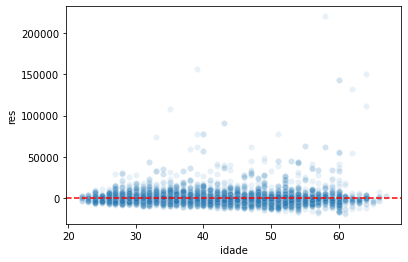

In [62]:
teste_stepwise['res'] = reg.resid

sns.scatterplot(x = 'idade',
                y = 'res', 
                data = teste_stepwise,
                alpha = 0.1)
plt.axhline(y=0, color='r', linestyle='--')


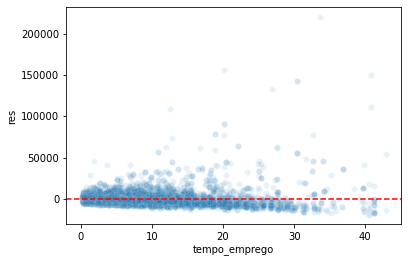

In [63]:
teste_stepwise['res'] = reg.resid

sns.scatterplot(x = 'tempo_emprego',
                y = 'res', 
                data = teste_stepwise,
                alpha = .1)
plt.axhline(y=0, color='r', linestyle='--')


In [81]:
teste_stepwise['pred_y'] = np.exp(reg.fittedvalues)

teste_stepwise[['pred_y', 'renda']].corr().iloc[0,1]**2


0.36280426437683105

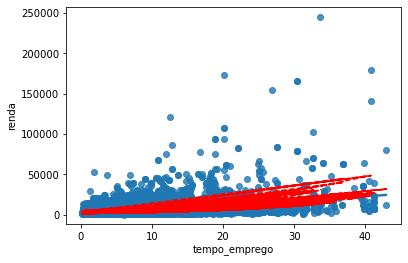

In [84]:
sns.regplot(x = 'tempo_emprego', y = 'renda', data = teste_stepwise)
plt.plot(teste_stepwise['tempo_emprego'], teste_stepwise['pred_y'], 'r,--')

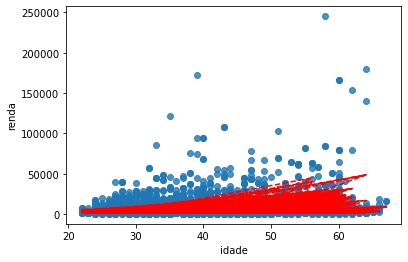

In [85]:
sns.regplot(x = 'idade', y = 'renda', data = teste_stepwise)
plt.plot(teste_stepwise['idade'], teste_stepwise['pred_y'], 'r,--')

**Realizando o log na variável resposta "renda", obteve um R2 melhor (no dado original) correspondente a 0,362, além de reduzir mais uma variável, qual seja estado_civil_casado.**

In [82]:
# ITEM 6 - Ajuste uma árvore de regressão e veja se consegue um 𝑅2 melhor com ela.

In [75]:
X = (df2.drop(columns=['index', 'Unnamed: 0','data_ref', 'id_cliente','renda']))
X = pd.get_dummies(X)
X['posse_de_veiculo'] = X['posse_de_veiculo'].astype(int)
X['posse_de_imovel'] = X['posse_de_imovel'].astype(int)
X = X.rename(columns= {'tipo_renda_Servidor público':'tipo_renda_Servidor_público',
                       'educacao_Pós graduação':'educacao_Pós_graduação',
                       'educacao_Superior completo': 'educacao_Superior_completo',
                       'educacao_Superior incompleto':'educacao_Superior_incompleto',
                       'tipo_residencia_Com os pais':'tipo_residencia_Com_os_pais'})
             
y = pd.DataFrame(df2['renda'])


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, train_size = 0.75, random_state=1000)


df_cor = pd.concat([X_train,y_train], axis = 1)
df_cor.corr()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,sexo_F,sexo_M,tipo_renda_Assalariado,tipo_renda_Bolsista,...,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Casa,tipo_residencia_Com_os_pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental,renda
posse_de_veiculo,1.000000,0.011761,0.081002,-0.114647,-0.077008,0.123331,-0.328110,0.328110,-0.001934,-0.023575,...,-0.070939,-0.058719,-0.059856,0.007948,-0.025524,0.021915,0.028953,0.038330,-0.018614,0.080748
posse_de_imovel,0.011761,1.000000,0.004535,0.091125,0.012578,-0.000828,0.046487,-0.046487,0.002238,0.019862,...,0.020486,-0.035374,0.023335,-0.026683,0.191178,-0.154918,-0.011716,-0.018481,-0.113160,0.013791
qtd_filhos,0.081002,0.004535,1.000000,-0.278259,-0.063929,0.904623,-0.076222,0.076222,0.031240,-0.017763,...,-0.139821,0.002836,-0.070163,-0.017909,0.007038,0.022378,-0.014419,0.009595,-0.029499,-0.003045
idade,-0.114647,0.091125,-0.278259,1.000000,0.330249,-0.252582,0.153500,-0.153500,0.026260,0.030250,...,-0.079161,-0.055540,0.153246,-0.050899,0.114105,-0.162053,-0.003084,0.012711,0.040239,0.132137
tempo_emprego,-0.077008,0.012578,-0.063929,0.330249,1.000000,-0.067178,0.137108,-0.137108,0.012246,0.011924,...,0.006765,-0.011694,0.033936,-0.042109,0.066314,-0.069583,-0.025140,0.023492,0.001112,0.386622
qt_pessoas_residencia,0.123331,-0.000828,0.904623,-0.252582,-0.067178,1.000000,-0.112274,0.112274,0.038401,-0.008908,...,-0.431158,0.064003,-0.193662,-0.028212,0.018548,0.007170,-0.013010,0.009374,-0.023392,0.013230
sexo_F,-0.328110,0.046487,-0.076222,0.153500,0.137108,-0.112274,1.000000,-1.000000,-0.052209,0.020951,...,0.033926,0.034612,0.118924,-0.065564,0.065669,-0.055615,0.004364,-0.045601,0.019208,-0.258235
sexo_M,0.328110,-0.046487,0.076222,-0.153500,-0.137108,0.112274,-1.000000,1.000000,0.052209,-0.020951,...,-0.033926,-0.034612,-0.118924,0.065564,-0.065669,0.055615,-0.004364,0.045601,-0.019208,0.258235
tipo_renda_Assalariado,-0.001934,0.002238,0.031240,0.026260,0.012246,0.038401,-0.052209,0.052209,1.000000,-0.034535,...,-0.047878,-0.020737,0.005939,-0.000668,-0.020607,0.027091,0.019091,-0.047943,0.016016,-0.010806
tipo_renda_Bolsista,-0.023575,0.019862,-0.017763,0.030250,0.011924,-0.008908,0.020951,-0.020951,-0.034535,1.000000,...,-0.010347,-0.007776,-0.004419,-0.003273,0.009595,-0.006630,-0.002013,-0.002151,-0.004681,-0.003217


In [77]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [78]:
mse1 = regr_1.score(X_train, y_train)
mse2 = regr_2.score(X_train, y_train)

template = "O R-quadrado para a base treinamento da árvore com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))


mse1 = regr_1.score(X_test, y_test)
mse2 = regr_2.score(X_test, y_test)

template = "O R-quadrado para a base de teste da árvore com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))


O R-quadrado para a base treinamento da árvore com profundidade=2 é: 0,27
O R-quadrado para a base treinamento da árvore com profundidade=8 é: 0,65
O R-quadrado para a base de teste da árvore com profundidade=2 é: 0,27
O R-quadrado para a base de teste da árvore com profundidade=8 é: 0,33


In [79]:
representacao_textual = tree.export_text(regr_2)
print(representacao_textual)

|--- feature_4 <= 17.01
|   |--- feature_6 <= 0.50
|   |   |--- feature_4 <= 6.92
|   |   |   |--- feature_4 <= 4.54
|   |   |   |   |--- feature_4 <= 1.71
|   |   |   |   |   |--- feature_10 <= 0.50
|   |   |   |   |   |   |--- feature_4 <= 0.90
|   |   |   |   |   |   |   |--- feature_5 <= 1.50
|   |   |   |   |   |   |   |   |--- value: [4236.37]
|   |   |   |   |   |   |   |--- feature_5 >  1.50
|   |   |   |   |   |   |   |   |--- value: [2986.35]
|   |   |   |   |   |   |--- feature_4 >  0.90
|   |   |   |   |   |   |   |--- feature_15 <= 0.50
|   |   |   |   |   |   |   |   |--- value: [4560.25]
|   |   |   |   |   |   |   |--- feature_15 >  0.50
|   |   |   |   |   |   |   |   |--- value: [3564.91]
|   |   |   |   |   |--- feature_10 >  0.50
|   |   |   |   |   |   |--- feature_3 <= 54.50
|   |   |   |   |   |   |   |--- feature_3 <= 40.50
|   |   |   |   |   |   |   |   |--- value: [4507.63]
|   |   |   |   |   |   |   |--- feature_3 >  40.50
|   |   |   |   |   |   |   |   |-

n_minimo,2,3,4,5,6,7,8,9
profundidade,,,,,,,,
2,0.269057,0.269057,0.269057,0.269057,0.269057,0.269057,0.269057,0.269057
3,0.350091,0.350091,0.350091,0.350091,0.350091,0.350091,0.350091,0.350091
4,0.375272,0.366519,0.366519,0.365787,0.368438,0.368438,0.368438,0.360716
5,0.369236,0.367197,0.367197,0.366413,0.377750,0.376237,0.376237,0.373364
6,0.358336,0.349541,0.346636,0.347580,0.362632,0.376174,0.375505,0.364621
7,0.321330,0.358582,0.351440,0.354795,0.369635,0.381986,0.379737,0.379168
8,0.327869,0.371947,0.367878,0.372121,0.394029,0.394244,0.390406,0.398615


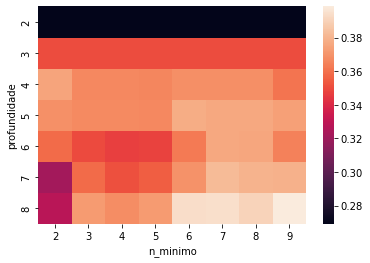

In [80]:
mses = []
ind_i = []
ind_j = []

for i in range(2, 9):
    for j in range(2, 10):
        regr_2 = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        regr_2.fit(X_train, y_train)
        mse2 = regr_2.score(X_test, y_test)
        mses.append(mse2)
        ind_i.append(i)
        ind_j.append(j)
        
df_mse = pd.DataFrame({'mses':mses, 'profundidade':ind_i, 'n_minimo':ind_j})
sns.heatmap(df_mse.pivot(index='profundidade', columns='n_minimo', values='mses'))
df_mse.pivot(index='profundidade', columns='n_minimo', values='mses')

In [81]:
# Calculando o caminho indicado pelo CCP-alphas da árvores

path = regr_2.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 7.68659737e+02, 1.37153576e+03, 1.69744308e+03,
        1.90942819e+03, 2.12746345e+03, 2.13236362e+03, 2.13881490e+03,
        3.88005020e+03, 4.24678815e+03, 4.70267643e+03, 4.72525575e+03,
        4.74226371e+03, 5.16176590e+03, 5.31503558e+03, 5.79851327e+03,
        6.66703298e+03, 6.67379894e+03, 6.75137210e+03, 6.91628704e+03,
        6.92385374e+03, 6.94718021e+03, 7.13497217e+03, 7.15943423e+03,
        7.29199597e+03, 7.81340359e+03, 7.94214538e+03, 8.19312071e+03,
        8.75190923e+03, 9.81086370e+03, 1.05417106e+04, 1.09971916e+04,
        1.14680396e+04, 1.19436978e+04, 1.19647927e+04, 1.30459709e+04,
        1.31510503e+04, 1.36719246e+04, 1.40011304e+04, 1.42632923e+04,
        1.43890973e+04, 1.44291147e+04, 1.44338417e+04, 1.46752118e+04,
        1.47999443e+04, 1.49072935e+04, 1.49435491e+04, 1.53011259e+04,
        1.55371000e+04, 1.60575311e+04, 1.75270305e+04, 1.80885200e+04,
        2.03740161e+04, 2.04863563e+04, 2.15603636

Text(0, 0.5, 'Impureza total das folhas')

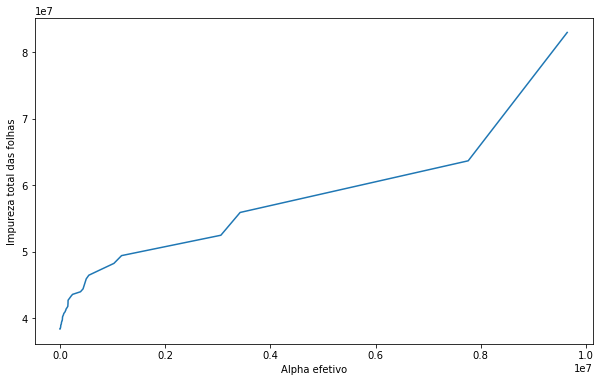

In [82]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

In [83]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'Profundidade da árvore')

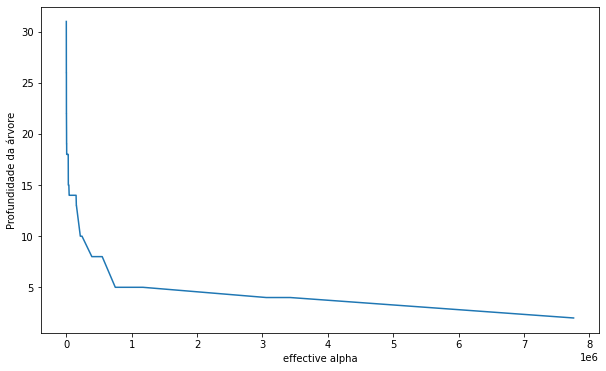

In [84]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

In [85]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]
 
print(train_scores)
print()
print(test_scores)

[15644125.202362906, 16078514.518609092, 16468238.207536997, 16659582.295478052, 16759914.0610268, 16834424.951127157, 16836554.02043399, 16840822.98976849, 17783050.07718102, 17910253.51674432, 18203342.62509197, 18208047.07624443, 18217515.41924161, 18360448.426778253, 18491001.754162174, 18650663.617423076, 18890409.51332502, 18897083.312269166, 18923946.243109144, 18978570.08001308, 18978570.08001308, 18999343.107607275, 19041614.98080628, 19077353.375497658, 19149580.971176498, 19293425.74301739, 19293425.74301739, 19350045.896056864, 19460069.213252444, 19717188.90484582, 19840909.520952713, 19948535.86673405, 19959667.649498116, 20159824.789399687, 20159824.789399687, 20434602.49309781, 20473913.091634136, 20527450.177868146, 20623985.894930754, 20638057.537633315, 20638057.537633315, 20652446.634897683, 20666875.749578454, 20754288.095769286, 20813228.075528864, 20813228.075528864, 20813228.075528864, 20979184.696594026, 21040983.830734994, 21168581.77587468, 21589846.237466488

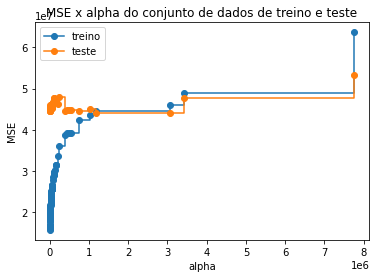

In [86]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()


In [87]:
arvore_final = DecisionTreeRegressor(random_state = 0, ccp_alpha = 1.5)
arvore_final.fit(X_train, y_train)

print(f"Profundidade:{arvore_final.tree_.max_depth}")
print(f"R-quadrado na base de teste: {arvore_final.score(X_test, y_test):.2f}")
print(f"MSE na base de teste: {mean_squared_error(y_test, arvore_final.predict(X_test )):.2f}")

Profundidade:31
R-quadrado na base de teste: 0.32
MSE na base de teste: 45889922.77


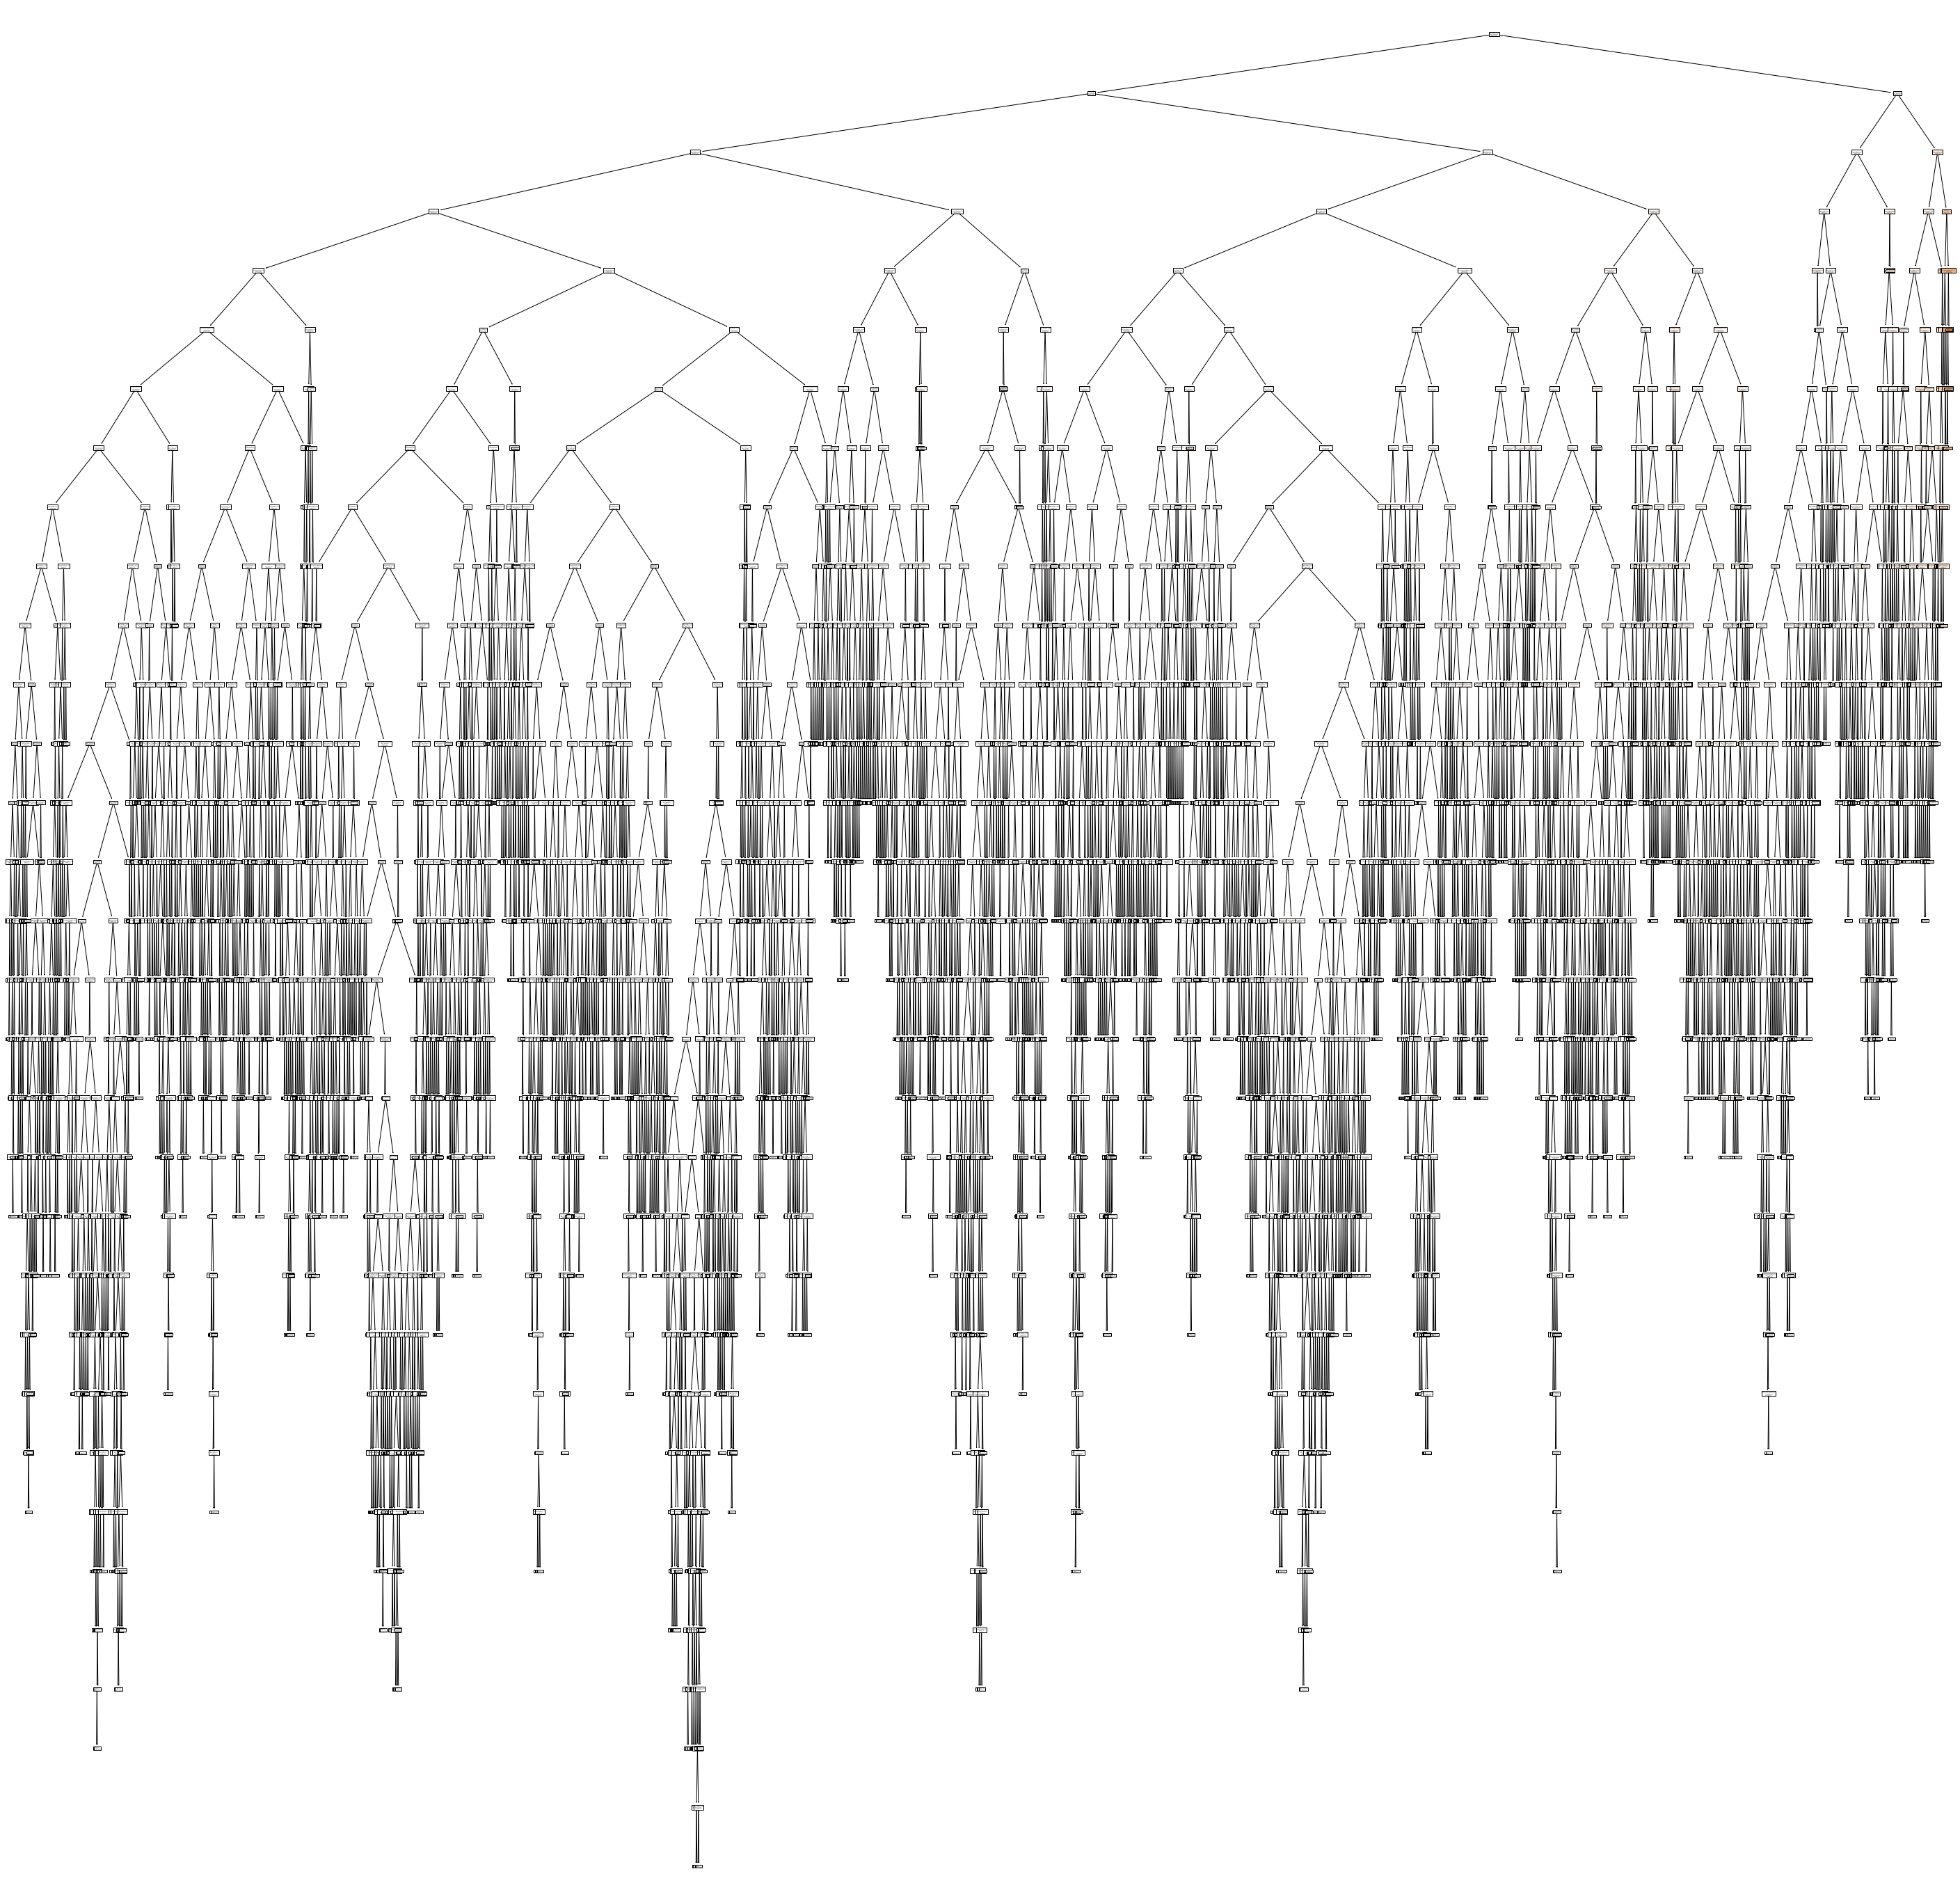

In [89]:
plt.figure(figsize=[50, 50])
tp = tree.plot_tree(arvore_final, 
                    feature_names=X_train.columns,  
                    filled=True) 

Através do ajuste da árvore de regressão (TreeRegressor) obteve uma árvore de regressão com R2 igual a 0,32 enquanto pelo metodo stepwise com log na resposta obteve R2 igual a 0,362, com menos variáveis.